In [30]:
import nltk
from nltk import bigrams
from nltk.translate.bleu_score import sentence_bleu
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.tokenize.treebank import TreebankWordTokenizer, TreebankWordDetokenizer
from nltk.corpus import wordnet as wn

import re
import itertools
import random
import pickle
import pandas as pd
from tqdm import tqdm
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# WMT16 and WMT17 segment-level data 

In [44]:
wmt_mst_seg_toen_scored = pickle.load(open('wmt_mst_seg_toen_scored.pkl', 'rb'))
wmt_mst_seg_toen_scored.head()

,lp,system,sid,sentBLEU,score,output,reference,source,year,level_ref:identity,...,bleurt:attack_out:remove_top25_stopwords,bert_score:attack_out:remove_top25_stopwords,bleurt:attack_ref:jumble,bert_score:attack_ref:jumble,bleurt:attack_out:jumble,bert_score:attack_out:jumble,bleurt:attack_ref:reverse,bert_score:attack_ref:reverse,bleurt:attack_out:reverse,bert_score:attack_out:reverse
3360,de-en,jhu-syntax,677,0.158512,0.691142,At the moment the men predominate among the st...,Currently the majority of staff are men.\n,Im Augenblick überwiegen bei den Mitarbeitern ...,2016,Currently the majority of staff are men.\n,...,0.054490,0.903080,-0.462874,0.896429,-1.081941,0.815683,-0.628216,0.905201,-0.946527,0.857626
3361,de-en,jhu-pbmt,1092,0.421134,-0.762188,"A good prank is funny, but it takes only momen...","A good prank is funny, but takes moments to re...","Ein guter Streich ist lustig, aber es dauert n...",2016,"A good prank is funny, but takes moments to re...",...,-1.016657,0.932712,-0.889460,0.871731,-1.517496,0.841614,-0.780593,0.868540,-1.259077,0.856650
3362,de-en,online-B,1375,0.505926,-0.599309,Threatening is above them at one end of the or...,Looming over them at one end of the central ba...,Drohend über ihnen an einem Ende des verzierte...,2016,Looming over them at one end of the central ba...,...,-0.712018,0.928888,-1.035963,0.862856,-1.188843,0.858966,-1.047946,0.834899,-1.178643,0.842053
3363,de-en,online-G,616,0.178942,-0.305292,"You see, why this program is not often discuss...",Can you see why that programme is often discus...,"Sehen Sie ein, warum dieses Programm oft disku...",2016,Can you see why that programme is often discus...,...,-0.041965,0.926274,-1.200449,0.845931,-1.160002,0.834712,-1.141166,0.838663,-1.217669,0.819141
3364,de-en,jhu-syntax,679,0.547704,0.362249,"Mrs Laury said: ""It is still a majority of men...","Mrs Laury said: ""We still have a majority of m...","Mrs Laury sagte: ""Es arbeitet immer noch eine ...",2016,"Mrs Laury said: ""We still have a majority of m...",...,0.058210,0.957313,-0.899600,0.848003,-0.985878,0.854237,-0.805962,0.846850,-0.902664,0.841248


In [45]:
level_sets = ['identity', 'remove_punct', 'remove_all_modifiers', 'replace_synonyms']
attacks = ['remove_all_stopwords', 'remove_top25_stopwords', 'jumble', 'reverse']

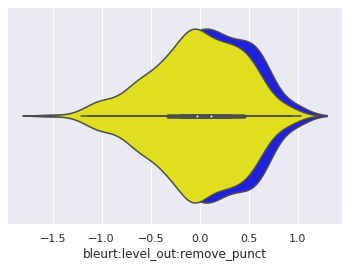

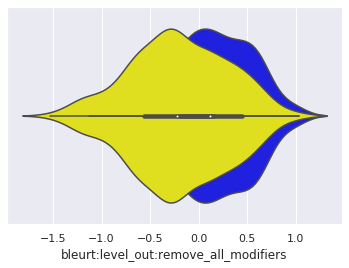

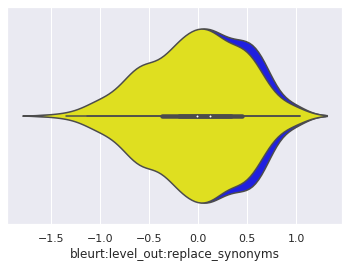

<Figure size 432x288 with 0 Axes>

In [46]:
for i in level_sets[1:]:
    sns.violinplot(x='bleurt:level_out:identity', data=wmt_mst_seg_toen_scored, color='blue')
    sns.violinplot(x='bleurt:level_out:%s' % i, data=wmt_mst_seg_toen_scored, color='yellow')
    plt.figure()

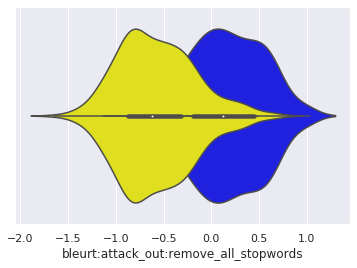

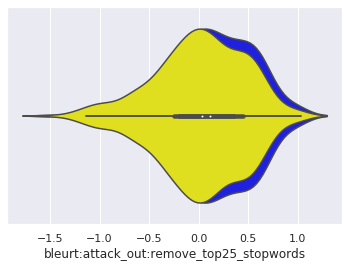

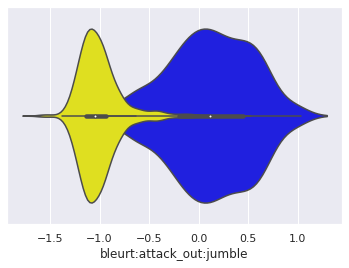

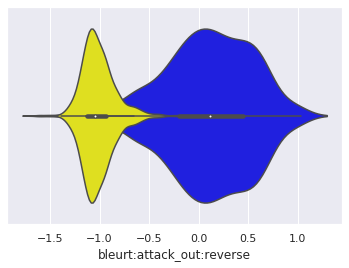

<Figure size 432x288 with 0 Axes>

In [49]:
for i in attacks:
    sns.violinplot(x='bleurt:level_out:identity', data=wmt_mst_seg_toen_scored, color='blue')
    sns.violinplot(x='bleurt:attack_out:%s' % i, data=wmt_mst_seg_toen_scored, color='yellow')
    plt.figure()

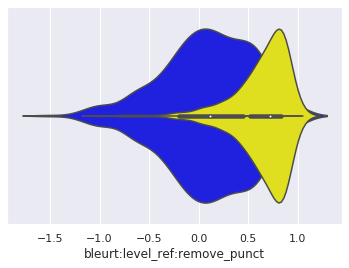

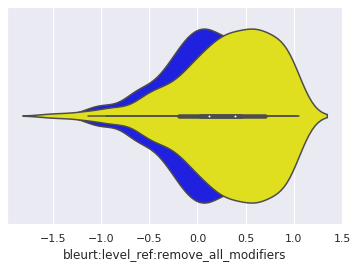

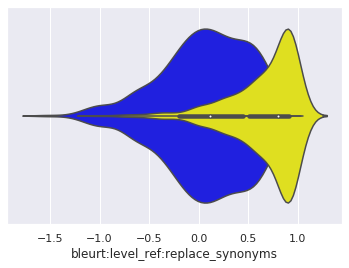

<Figure size 432x288 with 0 Axes>

In [57]:
for i in level_sets[1:]:
    sns.violinplot(x='bleurt:level_out:identity', data=wmt_mst_seg_toen_scored, color='blue')
    sns.violinplot(x='bleurt:level_ref:%s' % i, data=wmt_mst_seg_toen_scored, color='yellow')
    plt.figure()

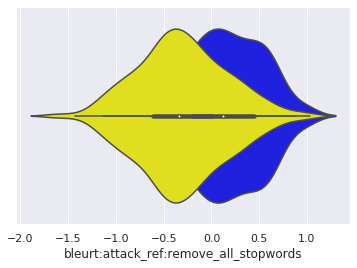

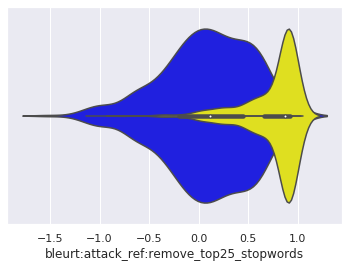

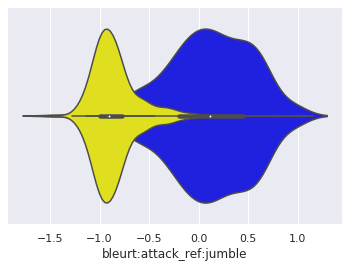

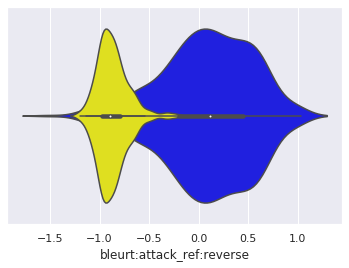

<Figure size 432x288 with 0 Axes>

In [58]:
for i in attacks:
    sns.violinplot(x='bleurt:level_out:identity', data=wmt_mst_seg_toen_scored, color='blue')
    sns.violinplot(x='bleurt:attack_ref:%s' % i, data=wmt_mst_seg_toen_scored, color='yellow')
    plt.figure()

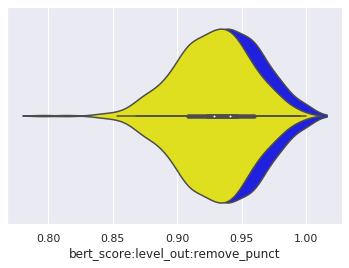

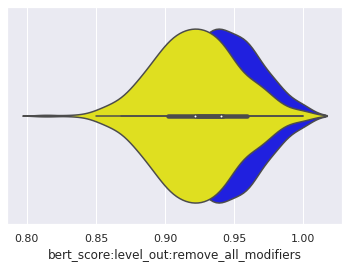

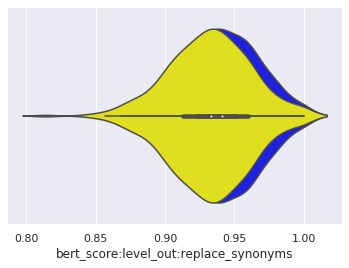

<Figure size 432x288 with 0 Axes>

In [50]:
for i in level_sets[1:]:
    sns.violinplot(x='bert_score:level_out:identity', data=wmt_mst_seg_toen_scored, color='blue')
    sns.violinplot(x='bert_score:level_out:%s' % i, data=wmt_mst_seg_toen_scored, color='yellow')
    plt.figure()

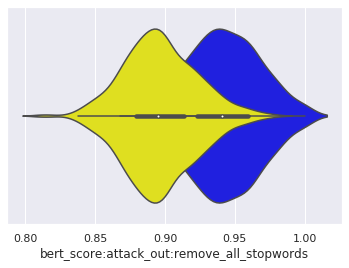

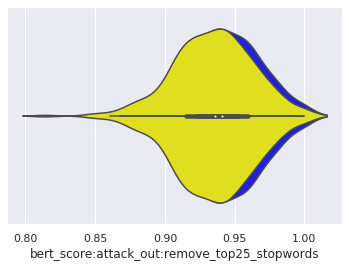

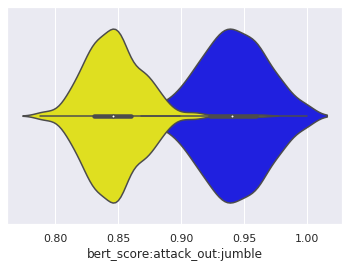

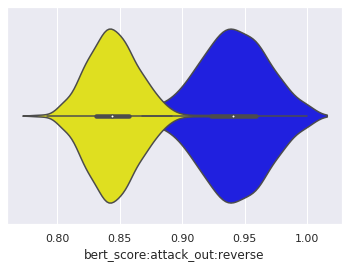

<Figure size 432x288 with 0 Axes>

In [51]:
for i in attacks:
    sns.violinplot(x='bert_score:level_out:identity', data=wmt_mst_seg_toen_scored, color='blue')
    sns.violinplot(x='bert_score:attack_out:%s' % i, data=wmt_mst_seg_toen_scored, color='yellow')
    plt.figure()

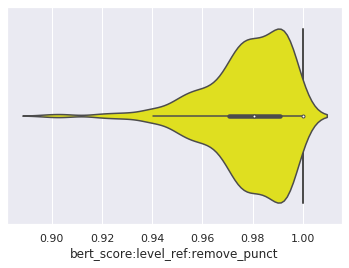

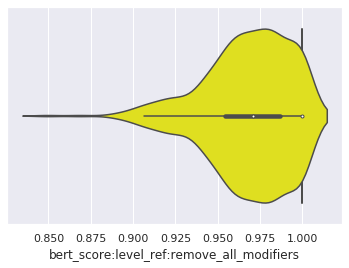

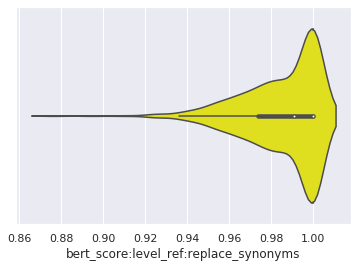

<Figure size 432x288 with 0 Axes>

In [52]:
for i in level_sets[1:]:
    sns.violinplot(x='bert_score:level_ref:identity', data=wmt_mst_seg_toen_scored, color='blue')
    sns.violinplot(x='bert_score:level_ref:%s' % i, data=wmt_mst_seg_toen_scored, color='yellow')
    plt.figure()

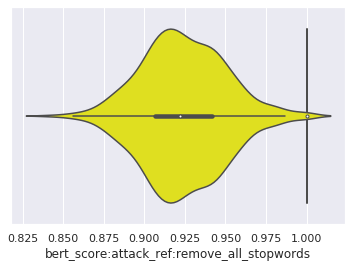

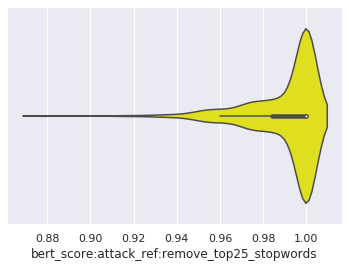

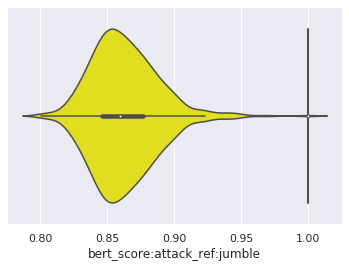

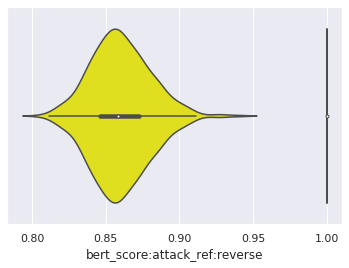

<Figure size 432x288 with 0 Axes>

In [54]:
for i in attacks:
    sns.violinplot(x='bert_score:level_ref:identity', data=wmt_mst_seg_toen_scored, color='blue')
    sns.violinplot(x='bert_score:attack_ref:%s' % i, data=wmt_mst_seg_toen_scored, color='yellow')
    plt.figure()